!jt -t chesterish
# !jt -r

In [34]:
from genetic_algorithm import *
from numpy.random import default_rng
from tqdm import tqdm
from itertools import product #combinations_with_replacement
%matplotlib notebook

import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation

import copy
from collections import Counter
import pandas as pd

In [60]:
## hexadecimal generator

nr_of_input = 2
nr_of_actions = 5
nr_of_inner = 3
nr_of_genes = 8
nr_individuals = 100

individuals = generate_initial_genomes_for_population(nr_individuals, nr_of_genes, nr_of_input, nr_of_actions, nr_of_inner)

## world size
ws = 20
world_size_x = ws
world_size_y = ws

##TODo if world_size_x != world_size_y fit then limit coord_full_list 

coord_full_list = np.array(list(product(range(ws), repeat=2)))
ind = np.random.choice(len(coord_full_list), nr_individuals, replace=False)
pos = coord_full_list[ind]

## initial brain and position generator

result = calculate_individual_output_weights(individuals)

## assign position and remove brains without output

indiv_to_del = []
for indiv in result:
    if result[indiv]['out']:
        result[indiv]['position'] = [list(pos[indiv])]
    else:
        indiv_to_del.append(indiv)

for key in indiv_to_del:
    del result[key] 

In [61]:
# rr = copy.copy(result)
# rr

In [62]:
nr_of_errors = 0

k = 40
n = 0
pbar = tqdm(total=k, initial=n)

while k>n: 
    pbar.update(1)
    for indiv in result:
        x, y = result[indiv]['position'][-1][0], result[indiv]['position'][-1][1]
        if n<1:
            calculate_position(result, indiv, x, y, world_size_x, world_size_y)    
        elif n >= 1:
            apply_input(result, indiv)
            calculate_position(result, indiv, x, y, world_size_x, world_size_y)
#     if n>1:
    last_pos_list = {obj:result[obj]['position'][-1] for obj in result}
    print(n)
#     print(last_pos_list)
#     print()
    for key_1, val_1 in last_pos_list.items():
        last_pos_list_copy = copy.copy(last_pos_list)
        del last_pos_list_copy[key_1]
        for key_2, val_2 in last_pos_list_copy.items():
            if val_1 == val_2:
                print('1',key_1, val_1, key_2, val_2)
                print('2', result[key_2]['position'][-1], result[key_2]['position'][-2])
                if result[key_2]['position'][-1] != result[key_2]['position'][-2]:
                    result[key_2]['position'][-1] = result[key_2]['position'][-2]
                    print('success')
#                 result[key_1]['position'][-1] = result[key_1]['position'][-2]
                print('3',result[key_2]['position'][-1])
                print()
#     else:
#         last_pos_list = {obj:result[obj]['position'][-1] for obj in result}
    n += 1
pbar.close()


 10%|███▌                               | 4/40 [00:00<00:01, 35.03it/s]

0
1 4 [15, 18] 28 [15, 18]
2 [15, 18] [16, 18]
success
3 [16, 18]

1 11 [15, 0] 44 [15, 0]
2 [15, 0] [15, 0]
3 [15, 0]

1 22 [4, 6] 53 [4, 6]
2 [4, 6] [4, 6]
3 [4, 6]

1 24 [8, 15] 78 [8, 15]
2 [8, 15] [9, 16]
success
3 [9, 16]

1 27 [2, 10] 51 [2, 10]
2 [2, 10] [1, 10]
success
3 [1, 10]

1 28 [15, 18] 4 [15, 18]
2 [15, 18] [16, 19]
success
3 [16, 19]

1 37 [17, 4] 69 [17, 4]
2 [17, 4] [17, 4]
3 [17, 4]

1 44 [15, 0] 11 [15, 0]
2 [15, 0] [16, 1]
success
3 [16, 1]

1 51 [2, 10] 27 [2, 10]
2 [2, 10] [3, 9]
success
3 [3, 9]

1 53 [4, 6] 22 [4, 6]
2 [4, 6] [4, 7]
success
3 [4, 7]

1 58 [7, 3] 87 [7, 3]
2 [7, 3] [7, 3]
3 [7, 3]

1 65 [10, 11] 66 [10, 11]
2 [10, 11] [11, 12]
success
3 [11, 12]

1 66 [10, 11] 65 [10, 11]
2 [10, 11] [9, 11]
success
3 [9, 11]

1 68 [12, 2] 96 [12, 2]
2 [12, 2] [13, 3]
success
3 [13, 3]

1 69 [17, 4] 37 [17, 4]
2 [17, 4] [16, 4]
success
3 [16, 4]

1 78 [8, 15] 24 [8, 15]
2 [8, 15] [7, 14]
success
3 [7, 14]

1 87 [7, 3] 58 [7, 3]
2 [7, 3] [8, 2]
success
3 [8, 2]


4
1 1 [6, 2] 58 [6, 2]
2 [6, 2] [7, 2]
success
3 [7, 2]

1 2 [0, 0] 19 [0, 0]
2 [0, 0] [0, 0]
3 [0, 0]

1 2 [0, 0] 92 [0, 0]
2 [0, 0] [1, 0]
success
3 [1, 0]

1 4 [15, 18] 28 [15, 18]
2 [15, 18] [16, 18]
success
3 [16, 18]

1 9 [3, 0] 82 [3, 0]
2 [3, 0] [4, 1]
success
3 [4, 1]

1 11 [15, 0] 44 [15, 0]
2 [15, 0] [15, 0]
3 [15, 0]

1 12 [7, 0] 59 [7, 0]
2 [7, 0] [6, 0]
success
3 [6, 0]

1 19 [0, 0] 2 [0, 0]
2 [0, 0] [0, 1]
success
3 [0, 1]

1 19 [0, 0] 92 [0, 0]
2 [1, 0] [1, 0]
3 [1, 0]

1 20 [13, 10] 55 [13, 10]
2 [13, 10] [14, 11]
success
3 [14, 11]

1 20 [13, 10] 83 [13, 10]
2 [13, 10] [12, 10]
success
3 [12, 10]

1 27 [2, 10] 46 [2, 10]
2 [2, 10] [2, 11]
success
3 [2, 11]

1 27 [2, 10] 51 [2, 10]
2 [2, 10] [1, 10]
success
3 [1, 10]

1 28 [15, 18] 4 [15, 18]
2 [15, 18] [16, 19]
success
3 [16, 19]

1 38 [13, 18] 49 [13, 18]
2 [13, 18] [12, 18]
success
3 [12, 18]

1 38 [13, 18] 88 [13, 18]
2 [13, 18] [14, 17]
success
3 [14, 17]

1 39 [13, 12] 67 [13, 12]
2 [13, 12] [14, 12]
success
3 [1

 20%|███████                            | 8/40 [00:00<00:01, 18.36it/s]

 28 [15, 18]
2 [16, 18] [16, 18]
3 [16, 18]

1 79 [12, 3] 57 [12, 3]
2 [12, 3] [13, 4]
success
3 [13, 4]

1 82 [3, 0] 9 [3, 0]
2 [3, 0] [3, 0]
3 [3, 0]

1 83 [13, 10] 20 [13, 10]
2 [13, 10] [13, 10]
3 [13, 10]

1 83 [13, 10] 55 [13, 10]
2 [14, 11] [14, 11]
3 [14, 11]

1 84 [17, 4] 69 [17, 4]
2 [17, 4] [17, 4]
3 [17, 4]

1 86 [0, 17] 21 [0, 17]
2 [0, 17] [0, 17]
3 [0, 17]

1 87 [6, 3] 1 [6, 3]
2 [6, 3] [6, 3]
3 [6, 3]

1 90 [0, 0] 2 [0, 0]
2 [0, 1] [0, 1]
3 [0, 1]

1 90 [0, 0] 19 [0, 0]
2 [0, 0] [0, 0]
3 [0, 0]

1 99 [0, 6] 15 [0, 6]
2 [0, 6] [1, 7]
success
3 [1, 7]

7
1 2 [0, 0] 19 [0, 0]
2 [0, 0] [0, 0]
3 [0, 0]

1 4 [15, 18] 28 [15, 18]
2 [15, 18] [16, 18]
success
3 [16, 18]

1 4 [15, 18] 76 [15, 18]
2 [15, 18] [15, 17]
success
3 [15, 17]

1 7 [10, 15] 91 [10, 15]
2 [10, 15] [10, 15]
3 [10, 15]

1 9 [3, 0] 82 [3, 0]
2 [3, 0] [4, 1]
success
3 [4, 1]

1 11 [14, 0] 44 [14, 0]
2 [14, 0] [14, 0]
3 [14, 0]

1 12 [7, 0] 17 [7, 0]
2 [7, 0] [8, 0]
success
3 [8, 0]

1 12 [7, 0] 31 [7, 0]
2 [7,

 28%|█████████▎                        | 11/40 [00:00<00:01, 16.90it/s]

[6, 10] 94 [6, 10]
2 [6, 10] [7, 10]
success
3 [7, 10]

1 94 [6, 10] 93 [6, 10]
2 [6, 10] [7, 11]
success
3 [7, 11]

1 99 [0, 6] 16 [0, 6]
2 [0, 6] [0, 5]
success
3 [0, 5]

10
1 2 [0, 0] 19 [0, 0]
2 [0, 0] [0, 0]
3 [0, 0]

1 2 [0, 0] 92 [0, 0]
2 [0, 0] [1, 0]
success
3 [1, 0]

1 4 [15, 18] 28 [15, 18]
2 [15, 18] [16, 18]
success
3 [16, 18]

1 4 [15, 18] 76 [15, 18]
2 [15, 18] [15, 17]
success
3 [15, 17]

1 6 [0, 11] 30 [0, 11]
2 [0, 11] [0, 12]
success
3 [0, 12]

1 7 [10, 14] 91 [10, 14]
2 [10, 14] [10, 14]
3 [10, 14]

1 9 [3, 0] 72 [3, 0]
2 [3, 0] [4, 0]
success
3 [4, 0]

1 9 [3, 0] 82 [3, 0]
2 [3, 0] [4, 1]
success
3 [4, 1]

1 10 [7, 14] 75 [7, 14]
2 [7, 14] [8, 14]
success
3 [8, 14]

1 11 [14, 0] 44 [14, 0]
2 [14, 0] [14, 0]
3 [14, 0]

1 11 [14, 0] 80 [14, 0]
2 [14, 0] [13, 0]
success
3 [13, 0]

1 12 [7, 0] 17 [7, 0]
2 [7, 0] [8, 0]
success
3 [8, 0]

1 12 [7, 0] 31 [7, 0]
2 [7, 0] [8, 1]
success
3 [8, 1]

1 12 [7, 0] 59 [7, 0]
2 [7, 0] [6, 0]
success
3 [6, 0]

1 12 [7, 0] 89 [7, 0]


 38%|████████████▊                     | 15/40 [00:00<00:01, 14.14it/s]

[7, 0]
2 [7, 0] [7, 0]
3 [7, 0]

1 89 [7, 0] 17 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 89 [7, 0] 31 [7, 0]
2 [8, 1] [8, 1]
3 [8, 1]

1 89 [7, 0] 59 [7, 0]
2 [6, 0] [6, 0]
3 [6, 0]

1 90 [0, 1] 41 [0, 1]
2 [1, 1] [1, 1]
3 [1, 1]

1 90 [0, 1] 56 [0, 1]
2 [0, 1] [0, 1]
3 [0, 1]

1 91 [10, 14] 7 [10, 14]
2 [10, 14] [9, 15]
success
3 [9, 15]

1 92 [0, 0] 2 [0, 0]
2 [0, 1] [0, 1]
3 [0, 1]

1 92 [0, 0] 19 [0, 0]
2 [0, 0] [0, 0]
3 [0, 0]

1 98 [2, 1] 22 [2, 1]
2 [2, 1] [3, 2]
success
3 [3, 2]

1 99 [0, 5] 15 [0, 5]
2 [0, 5] [1, 6]
success
3 [1, 6]

12
1 0 [9, 20] 88 [9, 20]
2 [9, 20] [10, 20]
success
3 [10, 20]

1 2 [0, 0] 19 [0, 0]
2 [0, 0] [0, 0]
3 [0, 0]

1 2 [0, 0] 41 [0, 0]
2 [0, 0] [1, 1]
success
3 [1, 1]

1 2 [0, 0] 92 [0, 0]
2 [0, 0] [1, 0]
success
3 [1, 0]

1 4 [15, 18] 28 [15, 18]
2 [15, 18] [16, 18]
success
3 [16, 18]

1 6 [0, 10] 48 [0, 10]
2 [0, 10] [0, 10]
3 [0, 10]

1 6 [0, 10] 51 [0, 10]
2 [0, 10] [1, 10]
success
3 [1, 10]

1 9 [3, 0] 82 [3, 0]
2 [3, 0] [4, 1]
success
3 [4, 1]

1 1

 42%|██████████████▍                   | 17/40 [00:01<00:01, 12.67it/s]

17 [7, 0] 89 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 19 [0, 0] 2 [0, 0]
2 [0, 0] [0, 1]
success
3 [0, 1]

1 19 [0, 0] 41 [0, 0]
2 [1, 1] [1, 1]
3 [1, 1]

1 19 [0, 0] 92 [0, 0]
2 [1, 0] [1, 0]
3 [1, 0]

1 20 [13, 10] 55 [13, 10]
2 [13, 10] [14, 11]
success
3 [14, 11]

1 21 [0, 17] 27 [0, 17]
2 [0, 17] [0, 16]
success
3 [0, 16]

1 21 [0, 17] 86 [0, 17]
2 [0, 17] [0, 18]
success
3 [0, 18]

1 22 [3, 0] 9 [3, 0]
2 [3, 0] [3, 0]
3 [3, 0]

1 22 [3, 0] 82 [3, 0]
2 [4, 1] [4, 1]
3 [4, 1]

1 24 [14, 20] 3 [14, 20]
2 [14, 20] [14, 20]
3 [14, 20]

1 25 [3, 5] 46 [3, 5]
2 [3, 5] [3, 6]
success
3 [3, 6]

1 25 [3, 5] 47 [3, 5]
2 [3, 5] [4, 6]
success
3 [4, 6]

1 27 [0, 17] 21 [0, 17]
2 [0, 17] [0, 17]
3 [0, 17]

1 27 [0, 17] 86 [0, 17]
2 [0, 18] [0, 18]
3 [0, 18]

1 28 [15, 18] 4 [15, 18]
2 [15, 18] [16, 19]
success
3 [16, 19]

1 30 [0, 10] 48 [0, 10]
2 [0, 10] [0, 10]
3 [0, 10]

1 30 [0, 10] 51 [0, 10]
2 [0, 10] [1, 10]
success
3 [1, 10]

1 31 [7, 0] 12 [7, 0]
2 [7, 0] [7, 0]
3 [7, 0]

1 31 [7, 0] 17 [7,

2 [0, 11] [0, 12]
success
3 [0, 12]

1 9 [3, 0] 71 [3, 0]
2 [3, 0] [4, 0]
success
3 [4, 0]

1 9 [3, 0] 72 [3, 0]
2 [3, 0] [4, 0]
success
3 [4, 0]

1 9 [3, 0] 82 [3, 0]
2 [3, 0] [4, 1]
success
3 [4, 1]

1 11 [14, 0] 44 [14, 0]
2 [14, 0] [14, 0]
3 [14, 0]

1 11 [14, 0] 80 [14, 0]
2 [14, 0] [13, 0]
success
3 [13, 0]

1 12 [7, 0] 17 [7, 0]
2 [7, 0] [8, 0]
success
3 [8, 0]

1 12 [7, 0] 31 [7, 0]
2 [7, 0] [8, 1]
success
3 [8, 1]

1 12 [7, 0] 59 [7, 0]
2 [7, 0] [6, 0]
success
3 [6, 0]

1 12 [7, 0] 89 [7, 0]
2 [7, 0] [8, 0]
success
3 [8, 0]

1 13 [20, 8] 37 [20, 8]
2 [20, 8] [20, 7]
success
3 [20, 7]

1 15 [0, 5] 58 [0, 5]
2 [0, 5] [0, 4]
success
3 [0, 4]

1 17 [7, 0] 12 [7, 0]
2 [7, 0] [7, 0]
3 [7, 0]

1 17 [7, 0] 31 [7, 0]
2 [8, 1] [8, 1]
3 [8, 1]

1 17 [7, 0] 59 [7, 0]
2 [6, 0] [6, 0]
3 [6, 0]

1 17 [7, 0] 89 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 19 [0, 0] 2 [0, 0]
2 [0, 0] [0, 1]
success
3 [0, 1]

1 20 [13, 10] 55 [13, 10]
2 [13, 10] [14, 11]
success
3 [14, 11]

1 20 [13, 10] 83 [13, 10]
2 [1

 48%|████████████████▏                 | 19/40 [00:01<00:01, 11.20it/s]

[7, 0] 17 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 59 [7, 0] 31 [7, 0]
2 [8, 1] [8, 1]
3 [8, 1]

1 59 [7, 0] 89 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 60 [5, 16] 26 [5, 16]
2 [5, 16] [5, 16]
3 [5, 16]

1 63 [20, 20] 32 [20, 20]
2 [20, 20] [20, 20]
3 [20, 20]

1 66 [10, 12] 91 [10, 12]
2 [10, 12] [10, 12]
3 [10, 12]

1 70 [0, 2] 95 [0, 2]
2 [0, 2] [0, 2]
3 [0, 2]

1 71 [3, 0] 9 [3, 0]
2 [3, 0] [3, 0]
3 [3, 0]

1 71 [3, 0] 82 [3, 0]
2 [4, 1] [4, 1]
3 [4, 1]

1 73 [7, 20] 35 [7, 20]
2 [7, 20] [8, 20]
success
3 [8, 20]

1 76 [16, 20] 24 [16, 20]
2 [16, 20] [15, 20]
success
3 [15, 20]

1 79 [12, 3] 57 [12, 3]
2 [12, 3] [13, 4]
success
3 [13, 4]

1 82 [3, 0] 9 [3, 0]
2 [3, 0] [3, 0]
3 [3, 0]

1 82 [3, 0] 71 [3, 0]
2 [4, 0] [4, 0]
3 [4, 0]

1 83 [13, 10] 20 [13, 10]
2 [13, 10] [13, 10]
3 [13, 10]

1 83 [13, 10] 55 [13, 10]
2 [14, 11] [14, 11]
3 [14, 11]

1 86 [0, 17] 21 [0, 17]
2 [0, 17] [0, 17]
3 [0, 17]

1 86 [0, 17] 27 [0, 17]
2 [0, 16] [0, 16]
3 [0, 16]

1 88 [9, 20] 0 [9, 20]
2 [9, 20] [9, 20]
3 [

 52%|█████████████████▊                | 21/40 [00:01<00:01, 11.19it/s]


2 [20, 19] [20, 19]
3 [20, 19]

1 64 [0, 2] 70 [0, 2]
2 [0, 2] [0, 2]
3 [0, 2]

1 64 [0, 2] 95 [0, 2]
2 [0, 2] [0, 2]
3 [0, 2]

1 70 [0, 2] 64 [0, 2]
2 [0, 2] [1, 3]
success
3 [1, 3]

1 70 [0, 2] 95 [0, 2]
2 [0, 2] [0, 2]
3 [0, 2]

1 71 [3, 0] 9 [3, 0]
2 [3, 0] [3, 0]
3 [3, 0]

1 71 [3, 0] 82 [3, 0]
2 [4, 1] [4, 1]
3 [4, 1]

1 73 [7, 20] 35 [7, 20]
2 [7, 20] [8, 20]
success
3 [8, 20]

1 75 [0, 13] 78 [0, 13]
2 [0, 13] [0, 13]
3 [0, 13]

1 78 [0, 13] 75 [0, 13]
2 [0, 13] [1, 13]
success
3 [1, 13]

1 79 [12, 3] 57 [12, 3]
2 [12, 3] [13, 4]
success
3 [13, 4]

1 80 [14, 0] 11 [14, 0]
2 [15, 0] [15, 0]
3 [15, 0]

1 80 [14, 0] 44 [14, 0]
2 [14, 0] [14, 0]
3 [14, 0]

1 81 [4, 16] 26 [4, 16]
2 [4, 16] [5, 16]
success
3 [5, 16]

1 82 [3, 0] 9 [3, 0]
2 [3, 0] [3, 0]
3 [3, 0]

1 82 [3, 0] 71 [3, 0]
2 [4, 0] [4, 0]
3 [4, 0]

1 83 [13, 10] 20 [13, 10]
2 [13, 10] [13, 10]
3 [13, 10]

1 83 [13, 10] 55 [13, 10]
2 [14, 11] [14, 11]
3 [14, 11]

1 84 [7, 0] 12 [7, 0]
2 [7, 0] [7, 0]
3 [7, 0]

1 84 [7, 0

 57%|███████████████████▌              | 23/40 [00:01<00:01, 10.06it/s]

[16, 20] 76 [16, 20]
2 [16, 20] [16, 20]
3 [16, 20]

1 4 [14, 17] 28 [14, 17]
2 [14, 17] [15, 17]
success
3 [15, 17]

1 9 [3, 0] 71 [3, 0]
2 [3, 0] [4, 0]
success
3 [4, 0]

1 9 [3, 0] 82 [3, 0]
2 [3, 0] [4, 1]
success
3 [4, 1]

1 11 [14, 0] 44 [14, 0]
2 [14, 0] [14, 0]
3 [14, 0]

1 12 [7, 0] 17 [7, 0]
2 [7, 0] [8, 0]
success
3 [8, 0]

1 12 [7, 0] 31 [7, 0]
2 [7, 0] [8, 1]
success
3 [8, 1]

1 12 [7, 0] 59 [7, 0]
2 [7, 0] [6, 0]
success
3 [6, 0]

1 12 [7, 0] 84 [7, 0]
2 [7, 0] [8, 0]
success
3 [8, 0]

1 12 [7, 0] 89 [7, 0]
2 [7, 0] [8, 0]
success
3 [8, 0]

1 15 [0, 5] 99 [0, 5]
2 [0, 5] [0, 6]
success
3 [0, 6]

1 16 [0, 10] 30 [0, 10]
2 [0, 10] [0, 10]
3 [0, 10]

1 16 [0, 10] 48 [0, 10]
2 [0, 10] [0, 10]
3 [0, 10]

1 17 [7, 0] 12 [7, 0]
2 [7, 0] [7, 0]
3 [7, 0]

1 17 [7, 0] 31 [7, 0]
2 [8, 1] [8, 1]
3 [8, 1]

1 17 [7, 0] 59 [7, 0]
2 [6, 0] [6, 0]
3 [6, 0]

1 17 [7, 0] 84 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 17 [7, 0] 89 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 19 [0, 0] 2 [0, 0]
2 [0, 0] [0, 1]


 62%|█████████████████████▎            | 25/40 [00:02<00:01,  9.82it/s]

23
1 0 [9, 20] 29 [9, 20]
2 [9, 20] [9, 19]
success
3 [9, 19]

1 2 [0, 0] 19 [0, 0]
2 [0, 0] [0, 0]
3 [0, 0]

1 2 [0, 0] 41 [0, 0]
2 [0, 0] [1, 1]
success
3 [1, 1]

1 2 [0, 0] 92 [0, 0]
2 [0, 0] [1, 0]
success
3 [1, 0]

1 3 [16, 20] 76 [16, 20]
2 [16, 20] [16, 20]
3 [16, 20]

1 4 [14, 17] 28 [14, 17]
2 [14, 17] [15, 17]
success
3 [15, 17]

1 7 [20, 6] 42 [20, 6]
2 [20, 6] [20, 6]
3 [20, 6]

1 9 [3, 0] 71 [3, 0]
2 [3, 0] [4, 0]
success
3 [4, 0]

1 9 [3, 0] 82 [3, 0]
2 [3, 0] [4, 1]
success
3 [4, 1]

1 11 [14, 0] 44 [14, 0]
2 [14, 0] [14, 0]
3 [14, 0]

1 12 [7, 0] 17 [7, 0]
2 [7, 0] [8, 0]
success
3 [8, 0]

1 12 [7, 0] 31 [7, 0]
2 [7, 0] [8, 1]
success
3 [8, 1]

1 12 [7, 0] 59 [7, 0]
2 [7, 0] [6, 0]
success
3 [6, 0]

1 12 [7, 0] 84 [7, 0]
2 [7, 0] [8, 0]
success
3 [8, 0]

1 12 [7, 0] 89 [7, 0]
2 [7, 0] [8, 0]
success
3 [8, 0]

1 15 [0, 6] 53 [0, 6]
2 [0, 6] [0, 6]
3 [0, 6]

1 15 [0, 6] 93 [0, 6]
2 [0, 6] [1, 7]
success
3 [1, 7]

1 16 [0, 10] 30 [0, 10]
2 [0, 10] [0, 10]
3 [0, 10]

1 16 [

 68%|██████████████████████▉           | 27/40 [00:02<00:01,  9.27it/s]

2 [0, 2] [0, 2]
3 [0, 2]

1 98 [0, 1] 56 [0, 1]
2 [0, 1] [0, 1]
3 [0, 1]

1 99 [0, 5] 15 [0, 5]
2 [1, 6] [1, 6]
3 [1, 6]

1 99 [0, 5] 23 [0, 5]
2 [1, 6] [1, 6]
3 [1, 6]

25
1 0 [9, 20] 29 [9, 20]
2 [9, 20] [9, 19]
success
3 [9, 19]

1 0 [9, 20] 88 [9, 20]
2 [9, 20] [10, 20]
success
3 [10, 20]

1 2 [0, 0] 19 [0, 0]
2 [0, 0] [0, 0]
3 [0, 0]

1 2 [0, 0] 22 [0, 0]
2 [0, 0] [1, 0]
success
3 [1, 0]

1 2 [0, 0] 41 [0, 0]
2 [0, 0] [1, 1]
success
3 [1, 1]

1 2 [0, 0] 92 [0, 0]
2 [0, 0] [1, 0]
success
3 [1, 0]

1 4 [13, 16] 28 [13, 16]
2 [13, 16] [14, 16]
success
3 [14, 16]

1 5 [20, 20] 32 [20, 20]
2 [20, 20] [20, 20]
3 [20, 20]

1 5 [20, 20] 63 [20, 20]
2 [20, 20] [19, 20]
success
3 [19, 20]

1 6 [0, 10] 16 [0, 10]
2 [0, 10] [0, 9]
success
3 [0, 9]

1 6 [0, 10] 30 [0, 10]
2 [0, 10] [0, 10]
3 [0, 10]

1 6 [0, 10] 48 [0, 10]
2 [0, 10] [0, 10]
3 [0, 10]

1 6 [0, 10] 51 [0, 10]
2 [0, 10] [1, 10]
success
3 [1, 10]

1 7 [20, 7] 37 [20, 7]
2 [20, 7] [20, 7]
3 [20, 7]

1 9 [3, 0] 46 [3, 0]
2 [3, 0] [3

 70%|███████████████████████▊          | 28/40 [00:02<00:01,  8.17it/s]

1 23 [0, 5] 15 [0, 5]
2 [0, 5] [1, 6]
success
3 [1, 6]

1 23 [0, 5] 93 [0, 5]
2 [1, 6] [1, 6]
3 [1, 6]

1 23 [0, 5] 99 [0, 5]
2 [0, 6] [0, 6]
3 [0, 6]

1 25 [3, 5] 66 [3, 5]
2 [3, 5] [4, 6]
success
3 [4, 6]

1 26 [4, 16] 81 [4, 16]
2 [4, 16] [4, 16]
3 [4, 16]

1 27 [0, 17] 21 [0, 17]
2 [0, 17] [0, 17]
3 [0, 17]

1 28 [13, 16] 4 [13, 16]
2 [13, 16] [14, 17]
success
3 [14, 17]

1 29 [9, 20] 0 [9, 20]
2 [9, 20] [9, 20]
3 [9, 20]

1 29 [9, 20] 88 [9, 20]
2 [10, 20] [10, 20]
3 [10, 20]

1 30 [0, 10] 48 [0, 10]
2 [0, 10] [0, 10]
3 [0, 10]

1 30 [0, 10] 51 [0, 10]
2 [0, 10] [1, 10]
success
3 [1, 10]

1 30 [0, 10] 78 [0, 10]
2 [0, 10] [0, 11]
success
3 [0, 11]

1 31 [7, 0] 12 [7, 0]
2 [7, 0] [7, 0]
3 [7, 0]

1 31 [7, 0] 17 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 31 [7, 0] 59 [7, 0]
2 [6, 0] [6, 0]
3 [6, 0]

1 31 [7, 0] 84 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 31 [7, 0] 89 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 32 [20, 20] 63 [20, 20]
2 [20, 20] [19, 20]
success
3 [19, 20]

1 35 [7, 20] 10 [7, 20]
2 [7, 20

 72%|████████████████████████▋         | 29/40 [00:02<00:01,  8.13it/s]

 [3, 0]

1 46 [3, 0] 71 [3, 0]
2 [4, 0] [4, 0]
3 [4, 0]

1 46 [3, 0] 82 [3, 0]
2 [4, 1] [4, 1]
3 [4, 1]

1 47 [0, 2] 70 [0, 2]
2 [0, 2] [0, 2]
3 [0, 2]

1 47 [0, 2] 95 [0, 2]
2 [0, 2] [0, 2]
3 [0, 2]

1 48 [0, 10] 30 [0, 10]
2 [0, 10] [0, 10]
3 [0, 10]

1 48 [0, 10] 51 [0, 10]
2 [1, 10] [1, 10]
3 [1, 10]

1 48 [0, 10] 78 [0, 10]
2 [0, 11] [0, 11]
3 [0, 11]

1 49 [15, 20] 24 [15, 20]
2 [15, 20] [15, 20]
3 [15, 20]

1 51 [0, 10] 30 [0, 10]
2 [0, 10] [0, 10]
3 [0, 10]

1 51 [0, 10] 48 [0, 10]
2 [0, 10] [0, 10]
3 [0, 10]

1 51 [0, 10] 78 [0, 10]
2 [0, 11] [0, 11]
3 [0, 11]

1 53 [0, 6] 23 [0, 6]
2 [0, 6] [1, 6]
success
3 [1, 6]

1 55 [13, 10] 20 [13, 10]
2 [13, 10] [13, 10]
3 [13, 10]

1 55 [13, 10] 83 [13, 10]
2 [12, 10] [12, 10]
3 [12, 10]

1 56 [0, 1] 64 [0, 1]
2 [0, 1] [1, 2]
success
3 [1, 2]

1 56 [0, 1] 90 [0, 1]
2 [0, 1] [0, 2]
success
3 [0, 2]

1 57 [12, 3] 79 [12, 3]
2 [12, 3] [13, 3]
success
3 [13, 3]

1 58 [0, 5] 15 [0, 5]
2 [0, 5] [1, 6]
success
3 [1, 6]

1 58 [0, 5] 93 [0, 5]


 75%|█████████████████████████▌        | 30/40 [00:02<00:01,  7.12it/s]

 [3, 1]

1 71 [3, 0] 72 [3, 0]
2 [4, 0] [4, 0]
3 [4, 0]

1 71 [3, 0] 82 [3, 0]
2 [4, 1] [4, 1]
3 [4, 1]

1 72 [3, 0] 9 [3, 0]
2 [3, 0] [3, 0]
3 [3, 0]

1 72 [3, 0] 46 [3, 0]
2 [3, 1] [3, 1]
3 [3, 1]

1 72 [3, 0] 71 [3, 0]
2 [4, 0] [4, 0]
3 [4, 0]

1 72 [3, 0] 82 [3, 0]
2 [4, 1] [4, 1]
3 [4, 1]

1 73 [7, 20] 35 [7, 20]
2 [7, 20] [8, 20]
success
3 [8, 20]

1 75 [0, 13] 45 [0, 13]
2 [0, 13] [1, 13]
success
3 [1, 13]

1 76 [16, 20] 24 [16, 20]
2 [15, 20] [15, 20]
3 [15, 20]

1 76 [16, 20] 49 [16, 20]
2 [15, 20] [15, 20]
3 [15, 20]

1 77 [20, 4] 18 [20, 4]
2 [20, 4] [19, 4]
success
3 [19, 4]

1 79 [12, 3] 57 [12, 3]
2 [12, 3] [13, 4]
success
3 [13, 4]

1 82 [3, 0] 9 [3, 0]
2 [3, 0] [3, 0]
3 [3, 0]

1 82 [3, 0] 46 [3, 0]
2 [3, 1] [3, 1]
3 [3, 1]

1 82 [3, 0] 71 [3, 0]
2 [4, 0] [4, 0]
3 [4, 0]

1 82 [3, 0] 72 [3, 0]
2 [4, 0] [4, 0]
3 [4, 0]

1 84 [7, 0] 12 [7, 0]
2 [7, 0] [7, 0]
3 [7, 0]

1 84 [7, 0] 17 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 84 [7, 0] 31 [7, 0]
2 [8, 1] [8, 1]
3 [8, 1]

1 84 [7, 

 78%|██████████████████████████▎       | 31/40 [00:02<00:01,  6.80it/s]

 [12, 3] 57 [12, 3]
2 [12, 3] [13, 4]
success
3 [13, 4]

1 82 [3, 0] 9 [3, 0]
2 [3, 0] [3, 0]
3 [3, 0]

1 82 [3, 0] 71 [3, 0]
2 [4, 0] [4, 0]
3 [4, 0]

1 82 [3, 0] 72 [3, 0]
2 [4, 0] [4, 0]
3 [4, 0]

1 83 [13, 10] 20 [13, 10]
2 [13, 10] [13, 10]
3 [13, 10]

1 83 [13, 10] 55 [13, 10]
2 [14, 11] [14, 11]
3 [14, 11]

1 84 [7, 0] 12 [7, 0]
2 [7, 0] [7, 0]
3 [7, 0]

1 84 [7, 0] 17 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 84 [7, 0] 31 [7, 0]
2 [8, 1] [8, 1]
3 [8, 1]

1 84 [7, 0] 39 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 84 [7, 0] 59 [7, 0]
2 [6, 0] [6, 0]
3 [6, 0]

1 84 [7, 0] 89 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 86 [0, 17] 21 [0, 17]
2 [0, 17] [0, 17]
3 [0, 17]

1 86 [0, 17] 27 [0, 17]
2 [0, 16] [0, 16]
3 [0, 16]

1 88 [9, 20] 0 [9, 20]
2 [9, 20] [9, 20]
3 [9, 20]

1 88 [9, 20] 29 [9, 20]
2 [9, 19] [9, 19]
3 [9, 19]

1 89 [7, 0] 12 [7, 0]
2 [7, 0] [7, 0]
3 [7, 0]

1 89 [7, 0] 17 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 89 [7, 0] 31 [7, 0]
2 [8, 1] [8, 1]
3 [8, 1]

1 89 [7, 0] 39 [7, 0]
2 [8, 0] [8, 0]
3 [

 80%|███████████████████████████▏      | 32/40 [00:03<00:01,  6.20it/s]

 [1, 0]

1 93 [0, 5] 15 [0, 5]
2 [1, 6] [1, 6]
3 [1, 6]

1 93 [0, 5] 58 [0, 5]
2 [0, 4] [0, 4]
3 [0, 4]

1 93 [0, 5] 99 [0, 5]
2 [0, 6] [0, 6]
3 [0, 6]

1 94 [0, 2] 47 [0, 2]
2 [0, 3] [0, 3]
3 [0, 3]

1 94 [0, 2] 70 [0, 2]
2 [0, 2] [0, 2]
3 [0, 2]

1 94 [0, 2] 95 [0, 2]
2 [0, 2] [0, 2]
3 [0, 2]

1 95 [0, 2] 47 [0, 2]
2 [0, 3] [0, 3]
3 [0, 3]

1 95 [0, 2] 70 [0, 2]
2 [0, 2] [0, 2]
3 [0, 2]

1 95 [0, 2] 94 [0, 2]
2 [0, 3] [0, 3]
3 [0, 3]

1 98 [3, 0] 9 [3, 0]
2 [3, 0] [3, 0]
3 [3, 0]

1 98 [3, 0] 46 [3, 0]
2 [3, 1] [3, 1]
3 [3, 1]

1 98 [3, 0] 71 [3, 0]
2 [4, 0] [4, 0]
3 [4, 0]

1 98 [3, 0] 72 [3, 0]
2 [4, 0] [4, 0]
3 [4, 0]

1 98 [3, 0] 82 [3, 0]
2 [4, 1] [4, 1]
3 [4, 1]

1 99 [0, 5] 15 [0, 5]
2 [1, 6] [1, 6]
3 [1, 6]

1 99 [0, 5] 58 [0, 5]
2 [0, 4] [0, 4]
3 [0, 4]

1 99 [0, 5] 93 [0, 5]
2 [1, 6] [1, 6]
3 [1, 6]

31
1 0 [9, 20] 29 [9, 20]
2 [9, 20] [9, 19]
success
3 [9, 19]

1 0 [9, 20] 88 [9, 20]
2 [9, 20] [10, 20]
success
3 [10, 20]

1 2 [0, 0] 19 [0, 0]
2 [0, 0] [0, 0]
3 [0, 0]

1 2 

 85%|████████████████████████████▉     | 34/40 [00:03<00:00,  6.09it/s]


1 89 [7, 0] 59 [7, 0]
2 [6, 0] [6, 0]
3 [6, 0]

1 89 [7, 0] 84 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 90 [0, 1] 56 [0, 1]
2 [0, 1] [0, 1]
3 [0, 1]

1 92 [0, 0] 2 [0, 0]
2 [0, 1] [0, 1]
3 [0, 1]

1 92 [0, 0] 19 [0, 0]
2 [0, 0] [0, 0]
3 [0, 0]

1 92 [0, 0] 41 [0, 0]
2 [1, 1] [1, 1]
3 [1, 1]

1 93 [0, 5] 15 [0, 5]
2 [1, 6] [1, 6]
3 [1, 6]

1 93 [0, 5] 58 [0, 5]
2 [0, 4] [0, 4]
3 [0, 4]

1 93 [0, 5] 99 [0, 5]
2 [0, 6] [0, 6]
3 [0, 6]

1 94 [0, 2] 47 [0, 2]
2 [0, 3] [0, 3]
3 [0, 3]

1 94 [0, 2] 70 [0, 2]
2 [0, 2] [0, 2]
3 [0, 2]

1 94 [0, 2] 95 [0, 2]
2 [0, 2] [0, 2]
3 [0, 2]

1 95 [0, 2] 47 [0, 2]
2 [0, 3] [0, 3]
3 [0, 3]

1 95 [0, 2] 70 [0, 2]
2 [0, 2] [0, 2]
3 [0, 2]

1 95 [0, 2] 94 [0, 2]
2 [0, 3] [0, 3]
3 [0, 3]

1 99 [0, 5] 15 [0, 5]
2 [1, 6] [1, 6]
3 [1, 6]

1 99 [0, 5] 58 [0, 5]
2 [0, 4] [0, 4]
3 [0, 4]

1 99 [0, 5] 93 [0, 5]
2 [1, 6] [1, 6]
3 [1, 6]

32
1 0 [9, 20] 29 [9, 20]
2 [9, 20] [9, 19]
success
3 [9, 19]

1 2 [0, 0] 19 [0, 0]
2 [0, 0] [0, 0]
3 [0, 0]

1 2 [0, 0] 64 [0, 0]
2 [0,

 88%|█████████████████████████████▊    | 35/40 [00:03<00:00,  6.10it/s]

1 0 [9, 20] 88 [9, 20]
2 [9, 20] [10, 20]
success
3 [10, 20]

1 1 [10, 0] 96 [10, 0]
2 [10, 0] [11, 0]
success
3 [11, 0]

1 2 [0, 0] 19 [0, 0]
2 [0, 0] [0, 0]
3 [0, 0]

1 2 [0, 0] 41 [0, 0]
2 [0, 0] [1, 1]
success
3 [1, 1]

1 2 [0, 0] 64 [0, 0]
2 [0, 0] [1, 1]
success
3 [1, 1]

1 2 [0, 0] 92 [0, 0]
2 [0, 0] [1, 0]
success
3 [1, 0]

1 4 [10, 13] 28 [10, 13]
2 [10, 13] [11, 13]
success
3 [11, 13]

1 5 [20, 18] 14 [20, 18]
2 [20, 18] [20, 18]
3 [20, 18]

1 7 [20, 4] 18 [20, 4]
2 [20, 4] [19, 4]
success
3 [19, 4]

1 7 [20, 4] 77 [20, 4]
2 [20, 4] [20, 4]
3 [20, 4]

1 9 [3, 0] 46 [3, 0]
2 [3, 0] [3, 1]
success
3 [3, 1]

1 9 [3, 0] 71 [3, 0]
2 [3, 0] [4, 0]
success
3 [4, 0]

1 9 [3, 0] 72 [3, 0]
2 [3, 0] [4, 0]
success
3 [4, 0]

1 9 [3, 0] 82 [3, 0]
2 [3, 0] [4, 1]
success
3 [4, 1]

1 10 [7, 20] 35 [7, 20]
2 [7, 20] [8, 20]
success
3 [8, 20]

1 10 [7, 20] 73 [7, 20]
2 [7, 20] [7, 20]
3 [7, 20]

1 11 [14, 0] 44 [14, 0]
2 [14, 0] [14, 0]
3 [14, 0]

1 12 [7, 0] 17 [7, 0]
2 [7, 0] [8, 0]
success

 90%|██████████████████████████████▌   | 36/40 [00:03<00:00,  6.21it/s]


3 [15, 20]

1 24 [16, 20] 76 [16, 20]
2 [16, 20] [16, 20]
3 [16, 20]

1 25 [2, 5] 33 [2, 5]
2 [2, 5] [2, 5]
3 [2, 5]

1 27 [0, 17] 86 [0, 17]
2 [0, 17] [0, 18]
success
3 [0, 18]

1 28 [10, 13] 4 [10, 13]
2 [10, 13] [11, 14]
success
3 [11, 14]

1 29 [9, 20] 0 [9, 20]
2 [9, 20] [9, 20]
3 [9, 20]

1 31 [7, 0] 12 [7, 0]
2 [7, 0] [7, 0]
3 [7, 0]

1 31 [7, 0] 17 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 31 [7, 0] 59 [7, 0]
2 [6, 0] [6, 0]
3 [6, 0]

1 31 [7, 0] 84 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 31 [7, 0] 89 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 32 [20, 20] 63 [20, 20]
2 [20, 20] [19, 20]
success
3 [19, 20]

1 33 [2, 5] 25 [2, 5]
2 [2, 5] [3, 5]
success
3 [3, 5]

1 35 [8, 20] 67 [8, 20]
2 [8, 20] [8, 20]
3 [8, 20]

1 36 [20, 0] 97 [20, 0]
2 [20, 0] [20, 0]
3 [20, 0]

1 38 [20, 19] 5 [20, 19]
2 [20, 19] [20, 18]
success
3 [20, 18]

1 38 [20, 19] 61 [20, 19]
2 [20, 19] [20, 19]
3 [20, 19]

1 41 [0, 0] 2 [0, 0]
2 [0, 1] [0, 1]
3 [0, 1]

1 41 [0, 0] 19 [0, 0]
2 [0, 0] [0, 0]
3 [0, 0]

1 41 [0, 0] 64 [0

 92%|███████████████████████████████▍  | 37/40 [00:03<00:00,  6.75it/s]

 [0, 2]
3 [0, 2]

1 55 [13, 10] 20 [13, 10]
2 [13, 10] [13, 10]
3 [13, 10]

1 55 [13, 10] 83 [13, 10]
2 [12, 10] [12, 10]
3 [12, 10]

1 56 [0, 1] 66 [0, 1]
2 [0, 1] [1, 2]
success
3 [1, 2]

1 56 [0, 1] 90 [0, 1]
2 [0, 1] [0, 2]
success
3 [0, 2]

1 56 [0, 1] 98 [0, 1]
2 [0, 1] [1, 1]
success
3 [1, 1]

1 57 [12, 3] 79 [12, 3]
2 [12, 3] [13, 3]
success
3 [13, 3]

1 59 [7, 0] 12 [7, 0]
2 [7, 0] [7, 0]
3 [7, 0]

1 59 [7, 0] 17 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 59 [7, 0] 31 [7, 0]
2 [8, 1] [8, 1]
3 [8, 1]

1 59 [7, 0] 84 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 59 [7, 0] 89 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 60 [2, 16] 26 [2, 16]
2 [2, 16] [3, 16]
success
3 [3, 16]

1 60 [2, 16] 81 [2, 16]
2 [2, 16] [2, 16]
3 [2, 16]

1 61 [20, 19] 5 [20, 19]
2 [20, 18] [20, 18]
3 [20, 18]

1 61 [20, 19] 38 [20, 19]
2 [20, 19] [20, 19]
3 [20, 19]

1 63 [20, 20] 32 [20, 20]
2 [20, 20] [20, 20]
3 [20, 20]

1 64 [0, 0] 2 [0, 0]
2 [0, 1] [0, 1]
3 [0, 1]

1 64 [0, 0] 19 [0, 0]
2 [0, 0] [0, 0]
3 [0, 0]

1 66 [0, 1] 56 

 98%|█████████████████████████████████▏| 39/40 [00:04<00:00,  6.39it/s]

[7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 84 [7, 0] 31 [7, 0]
2 [8, 1] [8, 1]
3 [8, 1]

1 84 [7, 0] 59 [7, 0]
2 [6, 0] [6, 0]
3 [6, 0]

1 84 [7, 0] 89 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 86 [0, 17] 27 [0, 17]
2 [0, 17] [0, 16]
success
3 [0, 16]

1 89 [7, 0] 12 [7, 0]
2 [7, 0] [7, 0]
3 [7, 0]

1 89 [7, 0] 17 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 89 [7, 0] 31 [7, 0]
2 [8, 1] [8, 1]
3 [8, 1]

1 89 [7, 0] 59 [7, 0]
2 [6, 0] [6, 0]
3 [6, 0]

1 89 [7, 0] 84 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 90 [0, 2] 47 [0, 2]
2 [0, 3] [0, 3]
3 [0, 3]

1 90 [0, 2] 70 [0, 2]
2 [0, 2] [0, 2]
3 [0, 2]

1 90 [0, 2] 94 [0, 2]
2 [0, 3] [0, 3]
3 [0, 3]

1 90 [0, 2] 95 [0, 2]
2 [0, 2] [0, 2]
3 [0, 2]

1 92 [0, 0] 2 [0, 0]
2 [0, 1] [0, 1]
3 [0, 1]

1 92 [0, 0] 19 [0, 0]
2 [0, 0] [0, 0]
3 [0, 0]

1 92 [0, 0] 22 [0, 0]
2 [1, 0] [1, 0]
3 [1, 0]

1 92 [0, 0] 64 [0, 0]
2 [1, 1] [1, 1]
3 [1, 1]

1 93 [0, 6] 53 [0, 6]
2 [0, 6] [0, 6]
3 [0, 6]

1 94 [0, 2] 47 [0, 2]
2 [0, 3] [0, 3]
3 [0, 3]

1 94 [0, 2] 70 [0, 2]
2 [0, 2] [0, 2]
3 [0,

100%|██████████████████████████████████| 40/40 [00:04<00:00,  6.98it/s]

2 [20, 19] [20, 19]
3 [20, 19]

1 6 [0, 11] 78 [0, 11]
2 [0, 11] [0, 12]
success
3 [0, 12]

1 7 [20, 4] 18 [20, 4]
2 [20, 4] [19, 4]
success
3 [19, 4]

1 9 [3, 0] 46 [3, 0]
2 [3, 0] [3, 1]
success
3 [3, 1]

1 9 [3, 0] 71 [3, 0]
2 [3, 0] [4, 0]
success
3 [4, 0]

1 9 [3, 0] 82 [3, 0]
2 [3, 0] [4, 1]
success
3 [4, 1]

1 11 [14, 0] 44 [14, 0]
2 [14, 0] [14, 0]
3 [14, 0]

1 12 [7, 0] 17 [7, 0]
2 [7, 0] [8, 0]
success
3 [8, 0]

1 12 [7, 0] 31 [7, 0]
2 [7, 0] [8, 1]
success
3 [8, 1]

1 12 [7, 0] 59 [7, 0]
2 [7, 0] [6, 0]
success
3 [6, 0]

1 12 [7, 0] 84 [7, 0]
2 [7, 0] [8, 0]
success
3 [8, 0]

1 12 [7, 0] 89 [7, 0]
2 [7, 0] [8, 0]
success
3 [8, 0]

1 15 [0, 5] 93 [0, 5]
2 [0, 5] [1, 6]
success
3 [1, 6]

1 15 [0, 5] 99 [0, 5]
2 [0, 5] [0, 6]
success
3 [0, 6]

1 17 [7, 0] 12 [7, 0]
2 [7, 0] [7, 0]
3 [7, 0]

1 17 [7, 0] 31 [7, 0]
2 [8, 1] [8, 1]
3 [8, 1]

1 17 [7, 0] 59 [7, 0]
2 [6, 0] [6, 0]
3 [6, 0]

1 17 [7, 0] 84 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 17 [7, 0] 89 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

100%|██████████████████████████████████| 40/40 [00:04<00:00,  8.81it/s]

 [3, 0] 71 [3, 0]
2 [4, 0] [4, 0]
3 [4, 0]

1 46 [3, 0] 82 [3, 0]
2 [4, 1] [4, 1]
3 [4, 1]

1 47 [0, 2] 70 [0, 2]
2 [0, 2] [0, 2]
3 [0, 2]

1 47 [0, 2] 95 [0, 2]
2 [0, 2] [0, 2]
3 [0, 2]

1 48 [0, 10] 16 [0, 10]
2 [0, 10] [0, 9]
success
3 [0, 9]

1 52 [1, 0] 22 [1, 0]
2 [1, 0] [1, 0]
3 [1, 0]

1 52 [1, 0] 92 [1, 0]
2 [1, 0] [1, 0]
3 [1, 0]

1 55 [13, 10] 20 [13, 10]
2 [13, 10] [13, 10]
3 [13, 10]

1 55 [13, 10] 83 [13, 10]
2 [12, 10] [12, 10]
3 [12, 10]

1 56 [0, 1] 66 [0, 1]
2 [0, 1] [1, 2]
success
3 [1, 2]

1 57 [12, 3] 79 [12, 3]
2 [12, 3] [13, 3]
success
3 [13, 3]

1 59 [7, 0] 12 [7, 0]
2 [7, 0] [7, 0]
3 [7, 0]

1 59 [7, 0] 17 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 59 [7, 0] 31 [7, 0]
2 [8, 1] [8, 1]
3 [8, 1]

1 59 [7, 0] 84 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 59 [7, 0] 89 [7, 0]
2 [8, 0] [8, 0]
3 [8, 0]

1 61 [20, 18] 5 [20, 18]
2 [20, 18] [20, 18]
3 [20, 18]

1 61 [20, 18] 14 [20, 18]
2 [20, 18] [20, 18]
3 [20, 18]

1 63 [20, 20] 32 [20, 20]
2 [20, 20] [20, 20]
3 [20, 20]

1 63 [20, 2

In [38]:
result

{0: {'out': {'out1': 0.922, 'out2': 0.885},
  'brain': {'mid1out1': ['mid1', 'out1', 1.2338776133068823],
   'in0out2': ['in0', 'out2', 1.0180375400579886],
   'in0mid0': ['in0', 'mid0', -1.0807874256065924],
   'mid1mid1': ['mid1', 'mid1', -2.7723485426522205],
   'in1mid0': ['in1', 'mid0', 2.4211200976651917],
   'mid2mid1': ['mid2', 'mid1', 0.2708988249656646]},
  'in': ['in0', 'in1'],
  'position': [[1, 8],
   [2, 7],
   [3, 6],
   [4, 5],
   [5, 4],
   [6, 3],
   [7, 2],
   [8, 1],
   [9, 0],
   [9, 0],
   [10, 0],
   [11, 0],
   [12, 0],
   [13, 0],
   [14, 0],
   [15, 0],
   [16, 0],
   [17, 0],
   [17, 0],
   [18, 0],
   [18, 0],
   [18, 0],
   [19, 0],
   [20, 0],
   [20, 0],
   [20, 0],
   [20, 0],
   [20, 0],
   [20, 0],
   [20, 0],
   [20, 0],
   [20, 0],
   [20, 0],
   [20, 0],
   [20, 0],
   [20, 0],
   [20, 0],
   [20, 0],
   [20, 0],
   [20, 0],
   [20, 0]],
  'brain_after_pruning': [('mid1', 'out1', 1.2338776133068823),
   ('in0', 'out2', 1.0180375400579886),
   ('in0'

In [39]:
# position_list = list(map(sum, zip(*[[0, -1], [1, 0], [0, 0], [0, 1]])))
# print(position_list)
# position_list = make_smaller_(position_list)
# print(position_list, x,y)
# position_list = list(map(sum, zip(*[[x, y]] + [position_list])))
# print(position_list)

In [40]:
# result[key_1]['position'][-1]

In [41]:
df = pd.DataFrame()
for key in result:
    df[key] = pd.Series(result[key]['position']).apply(lambda x: '.'.join((str(x[0]),str(x[1]))))

print(Counter(df.iloc[-1,:]).most_common())

df

[('0.0', 23), ('20.0', 7), ('20.20', 4), ('13.20', 3), ('7.0', 3), ('8.20', 2), ('0.20', 2), ('5.0', 2), ('4.20', 2), ('20.9', 2), ('5.20', 2), ('20.3', 2), ('0.18', 2), ('11.4', 1), ('9.2', 1), ('16.20', 1), ('19.0', 1), ('0.4', 1), ('20.7', 1), ('2.20', 1), ('3.20', 1), ('3.0', 1), ('12.20', 1), ('1.20', 1), ('20.18', 1), ('4.0', 1), ('1.17', 1), ('8.18', 1), ('15.0', 1), ('13.0', 1), ('0.9', 1), ('18.3', 1), ('12.0', 1), ('9.0', 1), ('1.19', 1), ('20.5', 1), ('0.12', 1), ('14.3', 1), ('18.20', 1), ('8.7', 1), ('0.6', 1), ('11.5', 1), ('14.5', 1), ('10.17', 1), ('10.4', 1), ('2.0', 1), ('0.7', 1), ('20.15', 1), ('0.1', 1), ('7.8', 1), ('0.16', 1), ('8.15', 1), ('20.12', 1), ('18.0', 1), ('19.20', 1), ('6.0', 1), ('10.12', 1)]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.8,8.16,15.4,8.14,13.19,11.3,11.2,16.17,3.0,12.0,...,8.8,1.7,4.11,4.12,3.4,6.13,19.5,19.9,6.18,10.12
1,2.7,7.16,14.3,8.14,13.20,11.3,11.2,16.18,3.0,12.0,...,8.8,1.6,4.12,4.12,4.5,7.12,19.5,19.10,6.17,10.12
2,3.6,6.15,13.2,8.14,13.20,11.3,11.2,16.19,4.0,12.0,...,8.9,1.5,4.11,4.13,5.6,7.11,20.5,19.11,6.16,10.12
3,4.5,6.14,12.1,8.15,13.20,11.3,11.2,16.20,5.0,11.0,...,8.9,1.4,5.12,4.13,6.7,7.10,20.5,19.12,6.15,10.12
4,5.4,6.13,11.0,8.15,13.20,11.3,11.2,16.20,6.0,11.0,...,8.10,1.3,6.11,4.13,7.8,7.9,20.5,19.13,6.14,10.12
5,6.3,5.12,10.0,8.15,13.20,11.3,11.2,16.20,7.0,10.0,...,8.11,1.2,7.11,4.14,8.9,6.8,20.5,19.14,6.13,10.12
6,7.2,4.11,9.0,8.15,13.20,11.3,11.2,16.20,8.0,10.0,...,8.11,1.1,7.11,4.14,9.10,5.7,20.5,19.15,6.12,10.12
7,8.1,3.10,8.0,8.16,13.20,11.3,11.2,16.20,9.0,10.0,...,8.11,1.0,8.10,4.15,10.11,5.6,20.5,19.16,6.11,10.12
8,9.0,2.9,7.0,8.17,13.20,11.3,11.2,16.20,10.0,9.0,...,8.10,1.0,9.9,4.16,11.12,6.5,20.5,19.17,6.10,10.12
9,9.0,2.8,6.0,8.17,13.20,11.3,11.2,16.20,11.0,8.0,...,8.11,1.0,9.8,4.16,12.13,6.4,20.5,19.18,6.9,10.12


In [42]:
df.iloc[-1,:][df.iloc[-1,:]=='1.0']


Series([], Name: 40, dtype: object)

In [43]:
result[4]['position']

[[13, 19],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20]]

In [44]:
result[4]['position']

[[13, 19],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20],
 [13, 20]]

In [45]:
# last_pos_list= [[tuple(result[obj]['position'][-1])] for obj in result]

In [46]:
# from itertools import chain
# Counter(chain(* l)).most_common()

generate dictionary of coords 

In [47]:
coords = [{'x':[], 'y':[]} for key in range(len(result[indiv]['position']))]
for indiv in result:
    for pos_nr, pos in enumerate(result[indiv]['position']):
        coords[pos_nr]['x'].append(pos[0])
        coords[pos_nr]['y'].append(pos[1])

visualisation

<IPython.core.display.Javascript object>


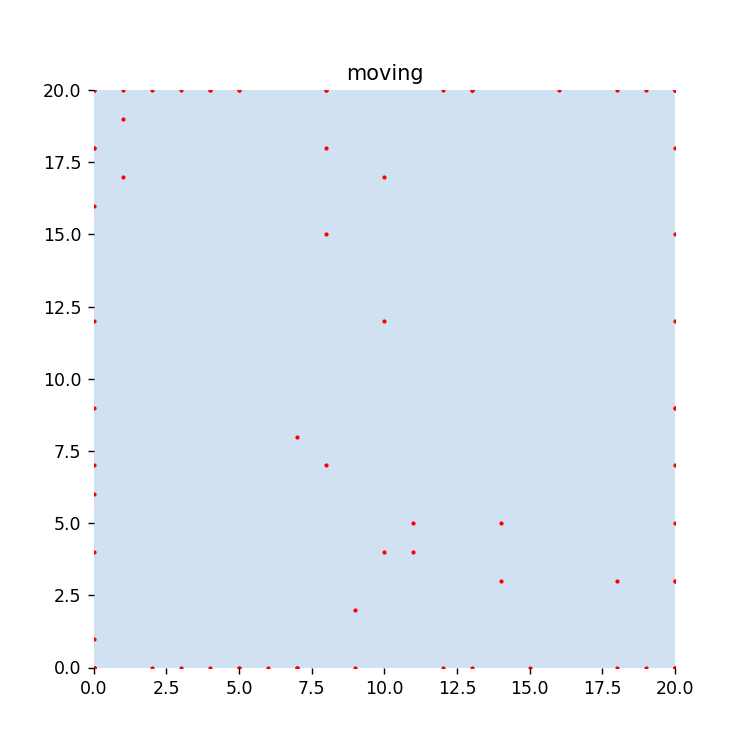

In [48]:
def update(i):
    ax.clear()
    ax.set_facecolor(plt.cm.Blues(.2))

    ax.set_xlim([0,world_size_x])
    ax.set_ylim([0,world_size_y])
    ax.set_title('moving')
    ax.scatter(x=coords[i]['x'],y=coords[i]['y'], c='red', s=2, marker='o')
    [spine.set_visible(False) for spine in ax.spines.values()] #remove chart 
    
fig, ax = plt.subplots(figsize=(6,6))
anime = FuncAnimation(
    fig = fig,
    func = update,
    frames = len(coords),
    interval = 10, repeat=False
)


### mutation

hexa to binary

In [49]:
binary = bin(int(individuals[0][0].hex_id, 16))[2:]
if len(binary) < 32:
    factor = 32 - len(binary)
    binary = '0' * factor + binary
binary

'11011110100001101001011110000100'